In [1]:
import os
import yaml

# 读取YAML配置
with open('/mnt/MCP/hagrid_dataset_512/data_hagrid.yaml', 'r') as f:
    data_config = yaml.safe_load(f)

print("数据集配置:")
print(f"训练集路径: {data_config['train']}")
print(f"验证集路径: {data_config['val']}") 
print(f"测试集路径: {data_config['test']}")
print(f"类别数量: {data_config['nc']}")
print(f"类别名称: {data_config['names']}")

数据集配置:
训练集路径: /mnt/MCP/hagrid_dataset_512/train
验证集路径: /mnt/MCP/hagrid_dataset_512/val
测试集路径: /mnt/MCP/hagrid_dataset_512/test
类别数量: 9
类别名称: ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two up']


In [2]:
# 检查训练集
train_images_dir = data_config['train']
train_labels_dir = '/mnt/MCP/hagrid_dataset_512/train_labels'

# 列出部分文件查看对应关系
image_files = [f for f in os.listdir(train_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
label_files = []
for class_name in data_config['names']:
    class_label_dir = os.path.join(train_labels_dir, class_name)
    if os.path.exists(class_label_dir):
        label_files.extend([f for f in os.listdir(class_label_dir) if f.endswith('.txt')])

print(f"\n训练集图像文件数量: {len(image_files)}")
print(f"训练集标注文件数量: {len(label_files)}")
print(f"前5个图像文件: {image_files[:5]}")
print(f"前5个标注文件: {label_files[:5]}")


训练集图像文件数量: 0
训练集标注文件数量: 181526
前5个图像文件: []
前5个标注文件: ['672a263d-1478-4739-a012-264f0f1fdab4.txt', 'd97f87c8-86cf-41dc-8b07-dcb5e290fd2f.txt', 'ff05ec2a-6a9e-46e8-a44f-b17a6029f2d2.txt', '0f0ef7ba-ea87-4f24-9760-053a79c104c5.txt', 'a5af9e97-90db-4704-bf8b-65ab8414bc00.txt']


In [3]:
# 随机检查几个标注文件的内容
import random

def check_annotation_files(labels_dir, class_names, num_samples=3):
    for class_name in class_names:
        class_label_dir = os.path.join(labels_dir, class_name)
        if os.path.exists(class_label_dir):
            txt_files = [f for f in os.listdir(class_label_dir) if f.endswith('.txt')]
            if txt_files:
                sample_files = random.sample(txt_files, min(num_samples, len(txt_files)))
                print(f"\n{class_name} 类别的标注文件示例:")
                for file in sample_files:
                    file_path = os.path.join(class_label_dir, file)
                    with open(file_path, 'r') as f:
                        content = f.read().strip()
                        print(f"  {file}: {content}")

# 检查训练集标注
print("训练集标注文件内容检查:")
check_annotation_files(train_labels_dir, data_config['names'])

训练集标注文件内容检查:

call 类别的标注文件示例:
  1338a65d-11bf-4303-84a7-83eb2c0010d2.txt: 0 0.47650076 0.4459387 0.2477095 0.28360232
  6d098009-e931-48fb-ad7e-8a6c181db8ad.txt: 0 0.247361705 0.39347237999999995 0.16327209 0.14845196
  d5befba0-efa8-4abb-8e93-6ca3193e3905.txt: 0 0.52857424 0.42971766 0.24858702 0.17368398

fist 类别的标注文件示例:
  2b3c6173-9fcc-4d4d-874b-34a10d130fda.txt: 
  4bbac49d-f563-401a-b252-a42e1ec5cd8f.txt: 
  571030ae-7fd4-4d93-96aa-956edd547402.txt: 

like 类别的标注文件示例:
  e3519c4a-50ba-4697-a667-ed05598ccf03.txt: 1 0.49135113 0.6253823900000001 0.16813338 0.12331332
  b0948178-007a-4956-bcf1-192461975f27.txt: 1 0.611560285 0.666343355 0.12264315 0.23673049
  8252ce7d-9768-48bf-a0c6-707a9fa0ca1e.txt: 1 0.59534673 0.46707862499999997 0.1403737 0.09393287

ok 类别的标注文件示例:
  2d2b125a-cfa8-46e1-af05-508f323ec6b1.txt: 
  77fd08b8-c97b-45f0-936b-85342ed59fab.txt: 
  03761954-6623-4bce-b442-b9324210faa1.txt: 

one 类别的标注文件示例:
  2fd621a7-94d8-4cc3-9218-6593f2104293.txt: 2 0.32972978 0.30241065 0

In [9]:
# 创建新的YAML配置，适应子目录结构
new_yaml_content = f"""
# Hagrid手势数据集 - 适应子目录结构
path: /mnt/MCP/hagrid_dataset_512  # 数据集根目录

# 训练、验证、测试集路径（相对于path）
train: train  # 图像在 train/<class_name>/ 中
val: val      # 图像在 val/<class_name>/ 中  
test: test    # 图像在 test/<class_name>/ 中

# 类别数量
nc: {len(corrected_names)}

# 类别名称（与目录名匹配）
names: {corrected_names}

# 标签路径（相对于path）
train_labels: train_labels
val_labels: val_labels
test_labels: test_labels

# 注意：此配置需要自定义数据加载器
"""

# 保存新的YAML文件
new_yaml_path = '/mnt/MCP/hagrid_dataset_512/data_hagrid_subdir.yaml'
with open(new_yaml_path, 'w') as f:
    f.write(new_yaml_content)

print(f"新的YAML配置文件已保存至: {new_yaml_path}")
print("配置内容:")
print(new_yaml_content)

新的YAML配置文件已保存至: /mnt/MCP/hagrid_dataset_512/data_hagrid_subdir.yaml
配置内容:

# Hagrid手势数据集 - 适应子目录结构
path: /mnt/MCP/hagrid_dataset_512  # 数据集根目录

# 训练、验证、测试集路径（相对于path）
train: train  # 图像在 train/<class_name>/ 中
val: val      # 图像在 val/<class_name>/ 中  
test: test    # 图像在 test/<class_name>/ 中

# 类别数量
nc: 9

# 类别名称（与目录名匹配）
names: ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two_up']

# 标签路径（相对于path）
train_labels: train_labels
val_labels: val_labels
test_labels: test_labels

# 注意：此配置需要自定义数据加载器



In [1]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class GestureDataset(Dataset):
    """手势数据集类，用于加载和处理手势图像及对应的YOLO格式标注"""
    
    def __init__(self, root_dir, split='train', transform=None):
        """
        初始化数据集
        :param root_dir: 数据集根目录
        :param split: 数据集类型，可选'train', 'test', 'val'
        :param transform: 图像变换函数
        """
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        
        # 图像和标签目录
        self.images_dir = os.path.join(root_dir, split)
        self.labels_dir = os.path.join(root_dir, f"{split}_labels")
        
        # 获取所有手势类别（排除zip文件）
        self.categories = [d for d in os.listdir(self.images_dir) 
                          if os.path.isdir(os.path.join(self.images_dir, d)) 
                          and not d.endswith('.zip')]
        self.category_to_idx = {cat: i for i, cat in enumerate(self.categories)}
        self.idx_to_category = {v: k for k, v in self.category_to_idx.items()}
        
        # 收集所有样本路径
        self.samples = self._collect_samples()
        
    def _collect_samples(self):
        """收集所有图像和对应的标签文件路径"""
        samples = []
        
        for category in self.categories:
            img_cat_dir = os.path.join(self.images_dir, category)
            label_cat_dir = os.path.join(self.labels_dir, category)
            
            # 确保标签目录存在
            if not os.path.exists(label_cat_dir):
                print(f"警告：标签目录不存在 {label_cat_dir}，跳过该类别")
                continue
            
            # 遍历图像文件
            for img_filename in os.listdir(img_cat_dir):
                # 只处理图像文件
                if img_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    img_path = os.path.join(img_cat_dir, img_filename)
                    
                    # 生成对应的标签文件名（同名不同扩展名）
                    img_basename = os.path.splitext(img_filename)[0]
                    label_filename = f"{img_basename}.txt"
                    label_path = os.path.join(label_cat_dir, label_filename)
                    
                    # 检查标签文件是否存在
                    if os.path.exists(label_path) and os.path.getsize(label_path) > 0:
                        samples.append((img_path, label_path, self.category_to_idx[category]))
        
        return samples
    
    def _parse_yolo_label(self, label_path, img_width, img_height):
        """
        解析YOLO格式的标签文件
        YOLO格式说明：每行包含 类别ID x_center y_center width height 
                     其中x_center, y_center, width, height均为归一化到[0,1]的值
                     以图像左上角为原点
        :param label_path: 标签文件路径
        :param img_width: 图像宽度
        :param img_height: 图像高度
        :return: 解析后的边界框 (xmin, ymin, xmax, ymax, class_id)
        """
        boxes = []
        
        with open(label_path, 'r') as f:
            for line_num, line in enumerate(f.readlines(), 1):
                line = line.strip()
                if not line:  # 跳过空行
                    continue
                
                # 分割字段（支持空格或制表符分隔）
                parts = line.split()
                if len(parts) != 5:
                    print(f"警告：{label_path} 第{line_num}行格式错误，跳过该行")
                    continue
                
                try:
                    # 解析字段：第一个是类别ID，后面四个是坐标
                    class_id = int(parts[0])
                    x_center = float(parts[1])
                    y_center = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])
                except ValueError:
                    print(f"警告：{label_path} 第{line_num}行数值解析错误，跳过该行")
                    continue
                
                # 检查归一化值是否在合理范围
                if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 
                        0 < width <= 1 and 0 < height <= 1):
                    print(f"警告：{label_path} 第{line_num}行坐标超出合理范围，跳过该行")
                    continue
                
                # 转换为绝对坐标 (xmin, ymin, xmax, ymax)
                xmin = (x_center - width / 2) * img_width
                ymin = (y_center - height / 2) * img_height
                xmax = (x_center + width / 2) * img_width
                ymax = (y_center + height / 2) * img_height
                
                # 确保坐标在图像范围内
                xmin = max(0, xmin)
                ymin = max(0, ymin)
                xmax = min(img_width, xmax)
                ymax = min(img_height, ymax)
                
                boxes.append([xmin, ymin, xmax, ymax, class_id])
        
        return np.array(boxes, dtype=np.float32)
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_path, label_path, category_id = self.samples[idx]
        
        # 读取图像
        image = cv2.imread(img_path)
        if image is None:
            raise ValueError(f"无法读取图像: {img_path}")
        
        # 转换为RGB格式（cv2默认读取为BGR）
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_height, img_width = image.shape[:2]
        
        # 解析标签
        boxes = self._parse_yolo_label(label_path, img_width, img_height)
        
        # 应用变换
        if self.transform:
            # 注意：如果需要同时变换边界框，需要自定义变换逻辑
            image = self.transform(image)
        
        return {
            'image': image,
            'boxes': torch.from_numpy(boxes),  # 边界框及标签内的类别ID
            'category_id': torch.tensor(category_id, dtype=torch.long),  # 文件夹对应的类别ID
            'image_path': img_path,
            'label_path': label_path
        }

# 使用示例
if __name__ == "__main__":
    dataset_root = "/mnt/MCP/hagrid_dataset_512"
    
    # 定义图像变换
    transform = transforms.Compose([
        transforms.ToPILImage(),  # 从numpy数组转换为PIL图像
        transforms.Resize((224, 224)),  # 调整大小
        transforms.ToTensor(),  # 转换为Tensor并归一化到[0,1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet均值
                             std=[0.229, 0.224, 0.225])   # ImageNet标准差
    ])
    
    # 创建数据集
    train_dataset = GestureDataset(
        root_dir=dataset_root,
        split='train',
        transform=transform
    )
    
    print(f"训练集样本数: {len(train_dataset)}")
    print(f"手势类别: {train_dataset.categories}")
    print(f"类别映射: {train_dataset.category_to_idx}")
    
    # 测试一个样本
    if len(train_dataset) > 0:
        sample = train_dataset[0]
        print(f"\n样本图像形状: {sample['image'].shape}")
        print(f"边界框信息: {sample['boxes']}")
        print(f"文件夹类别ID: {sample['category_id']}")
        print(f"对应类别名称: {train_dataset.idx_to_category[sample['category_id'].item()]}")
    
    # 创建数据加载器
    train_loader = DataLoader(
        train_dataset,
        batch_size=8,
        shuffle=True,
        num_workers=2,
        collate_fn=lambda x: {  # 处理可变长度的边界框
            'image': torch.stack([i['image'] for i in x]),
            'boxes': [i['boxes'] for i in x],
            'category_id': torch.tensor([i['category_id'] for i in x]),
            'image_path': [i['image_path'] for i in x]
        }
    )

训练集样本数: 65729
手势类别: ['ok', 'call', 'palm', 'fist', 'like', 'rock', 'three', 'one', 'two_up']
类别映射: {'ok': 0, 'call': 1, 'palm': 2, 'fist': 3, 'like': 4, 'rock': 5, 'three': 6, 'one': 7, 'two_up': 8}

样本图像形状: torch.Size([3, 224, 224])
边界框信息: tensor([[256.5231, 226.3248, 372.9645, 338.8653,   0.0000]])
文件夹类别ID: 1
对应类别名称: call


In [3]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import defaultdict

def check_dataset(root_dir, splits=['train', 'test', 'val']):
    """
    全面检查数据集情况
    :param root_dir: 数据集根目录
    :param splits: 需要检查的数据集分割（默认检查train、test、val）
    """
    # 存储所有检查结果
    report = {}
    
    for split in splits:
        print(f"\n{'='*50}")
        print(f"开始检查 {split} 数据集...")
        print(f"{'='*50}\n")
        
        # 初始化当前分割的报告
        split_report = {
            'total_categories': 0,
            'categories': [],
            'total_images': 0,
            'total_labels': 0,
            'image_label_mismatch': [],  # 图像与标签不匹配的情况
            'invalid_images': [],        # 无效/损坏的图像
            'invalid_labels': [],        # 格式错误的标签
            'empty_labels': [],          # 空标签文件
            'category_stats': defaultdict(dict),  # 每个类别的详细统计
            'image_size_dist': defaultdict(int),  # 图像尺寸分布
            'label_class_dist': defaultdict(int)  # 标签中类别ID分布
        }
        
        # 图像和标签根目录
        images_root = os.path.join(root_dir, split)
        labels_root = os.path.join(root_dir, f"{split}_labels")
        
        # 检查目录是否存在
        if not os.path.exists(images_root):
            print(f"错误：{split} 图像目录不存在 - {images_root}")
            report[split] = split_report
            continue
        if not os.path.exists(labels_root):
            print(f"错误：{split} 标签目录不存在 - {labels_root}")
            report[split] = split_report
            continue
        
        # 获取所有类别（排除zip文件和非目录）
        categories = [
            d for d in os.listdir(images_root)
            if os.path.isdir(os.path.join(images_root, d)) and not d.endswith('.zip')
        ]
        split_report['total_categories'] = len(categories)
        split_report['categories'] = categories
        
        if not categories:
            print(f"警告：{split} 数据集未发现任何类别目录")
            report[split] = split_report
            continue
        
        # 类别名称到ID的映射（用于校验标签中的类别ID）
        cat2id = {cat: i for i, cat in enumerate(categories)}
        
        # 遍历每个类别
        for cat in categories:
            print(f"检查类别: {cat}")
            cat_img_dir = os.path.join(images_root, cat)
            cat_label_dir = os.path.join(labels_root, cat)
            
            # 检查类别标签目录是否存在
            if not os.path.exists(cat_label_dir):
                print(f"  警告：{cat} 标签目录不存在 - {cat_label_dir}")
                split_report['category_stats'][cat]['exists'] = False
                continue
            split_report['category_stats'][cat]['exists'] = True
            
            # 获取所有图像文件（支持常见格式）
            img_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')
            images = [
                f for f in os.listdir(cat_img_dir)
                if f.lower().endswith(img_extensions) and os.path.isfile(os.path.join(cat_img_dir, f))
            ]
            num_images = len(images)
            split_report['total_images'] += num_images
            split_report['category_stats'][cat]['num_images'] = num_images
            
            # 获取所有标签文件
            labels = [
                f for f in os.listdir(cat_label_dir)
                if f.lower().endswith('.txt') and os.path.isfile(os.path.join(cat_label_dir, f))
            ]
            num_labels = len(labels)
            split_report['total_labels'] += num_labels
            split_report['category_stats'][cat]['num_labels'] = num_labels
            
            # 检查图像与标签的文件名匹配（排除扩展名）
            img_basenames = {os.path.splitext(f)[0] for f in images}
            label_basenames = {os.path.splitext(f)[0] for f in labels}
            
            # 有图像但无对应标签
            img_no_label = img_basenames - label_basenames
            if img_no_label:
                for basename in img_no_label:
                    img_path = os.path.join(cat_img_dir, f"{basename}{[e for e in img_extensions if f'{basename}{e}' in images][0]}")
                    split_report['image_label_mismatch'].append(f"图像无对应标签: {img_path}")
            split_report['category_stats'][cat]['img_no_label'] = len(img_no_label)
            
            # 有标签但无对应图像
            label_no_img = label_basenames - img_basenames
            if label_no_img:
                for basename in label_no_img:
                    label_path = os.path.join(cat_label_dir, f"{basename}.txt")
                    split_report['image_label_mismatch'].append(f"标签无对应图像: {label_path}")
            split_report['category_stats'][cat]['label_no_img'] = len(label_no_img)
            
            # 检查图像有效性和尺寸
            valid_images = 0
            for img_file in images:
                img_path = os.path.join(cat_img_dir, img_file)
                try:
                    # 尝试用OpenCV读取
                    img = cv2.imread(img_path)
                    if img is None:
                        # 尝试用PIL读取（处理某些特殊格式）
                        with Image.open(img_path) as pil_img:
                            pil_img.verify()  # 验证图像完整性
                        split_report['invalid_images'].append(f"OpenCV无法读取，但PIL可识别: {img_path}")
                    else:
                        h, w = img.shape[:2]
                        split_report['image_size_dist'][f"{w}x{h}"] += 1
                        valid_images += 1
                except Exception as e:
                    split_report['invalid_images'].append(f"损坏的图像: {img_path} (错误: {str(e)})")
            split_report['category_stats'][cat]['valid_images'] = valid_images
            
            # 检查标签文件有效性
            valid_labels = 0
            for label_file in labels:
                label_path = os.path.join(cat_label_dir, label_file)
                
                # 检查是否为空文件
                if os.path.getsize(label_path) == 0:
                    split_report['empty_labels'].append(f"空标签文件: {label_path}")
                    continue
                
                # 解析标签内容
                try:
                    with open(label_path, 'r') as f:
                        lines = f.readlines()
                    
                    valid_line = True
                    for line_num, line in enumerate(lines, 1):
                        line = line.strip()
                        if not line:
                            continue
                        
                        parts = line.split()
                        if len(parts) != 5:
                            split_report['invalid_labels'].append(
                                f"标签格式错误（字段数不对）: {label_path} 第{line_num}行"
                            )
                            valid_line = False
                            break
                        
                        # 检查数值格式
                        try:
                            class_id = int(parts[0])
                            x_center = float(parts[1])
                            y_center = float(parts[2])
                            width = float(parts[3])
                            height = float(parts[4])
                        except ValueError:
                            split_report['invalid_labels'].append(
                                f"标签数值错误: {label_path} 第{line_num}行"
                            )
                            valid_line = False
                            break
                        
                        # 检查归一化范围
                        if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and
                                0 < width <= 1 and 0 < height <= 1):
                            split_report['invalid_labels'].append(
                                f"标签坐标超出范围: {label_path} 第{line_num}行"
                            )
                            valid_line = False
                            break
                        
                        # 记录标签中的类别ID分布
                        split_report['label_class_dist'][class_id] += 1
                        
                        # 检查标签类别ID是否与文件夹类别匹配（如果需要严格匹配）
                        # if class_id != cat2id[cat]:
                        #     split_report['invalid_labels'].append(
                        #         f"标签类别ID与文件夹不匹配: {label_path} 第{line_num}行 (预期{cat2id[cat]}, 实际{class_id})"
                        #     )
                        #     valid_line = False
                        #     break
                    
                    if valid_line:
                        valid_labels += 1
                
                except Exception as e:
                    split_report['invalid_labels'].append(f"标签文件读取错误: {label_path} (错误: {str(e)})")
            
            split_report['category_stats'][cat]['valid_labels'] = valid_labels
            print(f"  图像总数: {num_images}, 有效图像: {valid_images}")
            print(f"  标签总数: {num_labels}, 有效标签: {valid_labels}")
            print(f"  图像无标签: {len(img_no_label)}, 标签无图像: {len(label_no_img)}\n")
        
        # 保存当前分割的报告
        report[split] = split_report
        
        # 输出当前分割的汇总信息
        print(f"\n{split} 数据集汇总:")
        print(f"  类别数量: {split_report['total_categories']}")
        print(f"  总图像数量: {split_report['total_images']}")
        print(f"  总标签数量: {split_report['total_labels']}")
        print(f"  图像标签不匹配: {len(split_report['image_label_mismatch'])}")
        print(f"  无效/损坏图像: {len(split_report['invalid_images'])}")
        print(f"  无效标签文件: {len(split_report['invalid_labels'])}")
        print(f"  空标签文件: {len(split_report['empty_labels'])}")
        
        # 输出图像尺寸分布（前5种最常见的尺寸）
        print("\n  常见图像尺寸 (宽x高):")
        sorted_sizes = sorted(split_report['image_size_dist'].items(), key=lambda x: x[1], reverse=True)[:5]
        for size, count in sorted_sizes:
            print(f"    {size}: {count} 张")
        
        # 输出标签中类别ID分布
        print("\n  标签中类别ID分布:")
        for class_id, count in sorted(split_report['label_class_dist'].items()):
            print(f"    类别ID {class_id}: {count} 次")
    
    print(f"\n{'='*50}")
    print("数据集检查完成！")
    print(f"{'='*50}")
    
    return report

if __name__ == "__main__":
    # 数据集根目录（请根据实际路径修改）
    dataset_root = "/mnt/MCP/hagrid_dataset_512"
    
    # 执行检查
    report = check_dataset(dataset_root)
    
    # 如果需要保存报告到文件
    # import json
    # with open('dataset_report.json', 'w', encoding='utf-8') as f:
    #     json.dump(report, f, ensure_ascii=False, indent=2)


开始检查 train 数据集...

检查类别: ok
  图像总数: 23131, 有效图像: 23131
  标签总数: 23131, 有效标签: 0
  图像无标签: 0, 标签无图像: 0

检查类别: call
  图像总数: 20034, 有效图像: 20034
  标签总数: 20034, 有效标签: 20034
  图像无标签: 0, 标签无图像: 0

检查类别: palm
  图像总数: 23654, 有效图像: 23654
  标签总数: 23654, 有效标签: 0
  图像无标签: 0, 标签无图像: 0

检查类别: fist
  图像总数: 23480, 有效图像: 23480
  标签总数: 23480, 有效标签: 0
  图像无标签: 0, 标签无图像: 0

检查类别: like
  图像总数: 23197, 有效图像: 23197
  标签总数: 23197, 有效标签: 0
  图像无标签: 0, 标签无图像: 0

检查类别: rock


KeyboardInterrupt: 

In [4]:
import os
import pandas as pd
from collections import Counter

def analyze_dataset_structure():
    """分析数据集结构"""
    base_path = "/mnt/MCP/hagrid_dataset_512"
    datasets = ['train', 'val', 'test']
    classes = ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two_up']
    
    print("📊 数据集结构分析")
    print("=" * 50)
    
    stats = {}
    for dataset in datasets:
        dataset_stats = {}
        dataset_path = os.path.join(base_path, dataset)
        
        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)
            if os.path.exists(class_path):
                # 统计图像文件
                image_files = [f for f in os.listdir(class_path) 
                              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                dataset_stats[class_name] = len(image_files)
            else:
                dataset_stats[class_name] = 0
                print(f"⚠️  警告: {dataset}/{class_name} 目录不存在")
        
        stats[dataset] = dataset_stats
    
    # 显示统计信息
    df_stats = pd.DataFrame(stats)
    print("\n数据集统计:")
    print(df_stats)
    
    # 总计
    total_images = sum(sum(dataset_stats.values()) for dataset_stats in stats.values())
    print(f"\n总图像数量: {total_images}")
    
    return stats, classes

# 运行分析
dataset_stats, class_names = analyze_dataset_structure()

📊 数据集结构分析

数据集统计:
        train   val  test
call    20034  3000  4992
fist    23480  2999  4993
like    23197  2999  4992
ok      23131  2999  4997
one     23034  3000  4995
palm    23654  2999  4992
rock    22311  2997  4998
three   22685  2998  4995
two_up  22661  2999  4993

总图像数量: 276124


In [5]:
import shutil
import random

def create_classification_dataset():
    """创建分类数据集所需的文件结构"""
    base_path = "/mnt/MCP/hagrid_dataset_512"
    classification_base = "/mnt/MCP/hagrid_classification"
    
    # 创建分类数据集目录
    os.makedirs(classification_base, exist_ok=True)
    
    datasets = ['train', 'val', 'test']
    
    print("🏗️ 创建分类数据集结构")
    print("=" * 50)
    
    for dataset in datasets:
        dataset_path = os.path.join(base_path, dataset)
        classification_dataset_path = os.path.join(classification_base, dataset)
        
        # 为每个数据集创建目录
        os.makedirs(classification_dataset_path, exist_ok=True)
        
        # 为每个类别创建子目录
        for class_name in class_names:
            class_path = os.path.join(classification_dataset_path, class_name)
            os.makedirs(class_path, exist_ok=True)
        
        print(f"✅ 创建 {dataset} 目录结构")
    
    return classification_base

# 创建分类数据集目录
classification_base = create_classification_dataset()

🏗️ 创建分类数据集结构
✅ 创建 train 目录结构
✅ 创建 val 目录结构
✅ 创建 test 目录结构


In [6]:
def create_classification_labels():
    """创建分类标签文件"""
    base_path = "/mnt/MCP/hagrid_dataset_512"
    classification_base = "/mnt/MCP/hagrid_classification"
    
    datasets = ['train', 'val', 'test']
    
    print("🏷️ 生成分类标签")
    print("=" * 50)
    
    # 创建类别映射
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}
    idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}
    
    print("类别映射:")
    for class_name, idx in class_to_idx.items():
        print(f"  {class_name} -> {idx}")
    
    # 保存类别映射
    mapping_file = os.path.join(classification_base, "class_mapping.json")
    import json
    with open(mapping_file, 'w') as f:
        json.dump({
            'class_to_idx': class_to_idx,
            'idx_to_class': idx_to_class
        }, f, indent=2)
    
    print(f"✅ 类别映射已保存: {mapping_file}")
    
    # 为每个数据集创建标签文件
    for dataset in datasets:
        dataset_path = os.path.join(base_path, dataset)
        classification_dataset_path = os.path.join(classification_base, dataset)
        
        labels = []
        
        for class_name in class_names:
            class_path = os.path.join(dataset_path, class_name)
            if not os.path.exists(class_path):
                continue
                
            # 获取该类别的所有图像文件
            image_files = [f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            # 复制文件到分类数据集目录
            classification_class_path = os.path.join(classification_dataset_path, class_name)
            for image_file in image_files:
                src_path = os.path.join(class_path, image_file)
                dst_path = os.path.join(classification_class_path, image_file)
                
                # 复制文件
                shutil.copy2(src_path, dst_path)
                
                # 记录标签
                labels.append({
                    'image_path': os.path.join(dataset, class_name, image_file),
                    'class_name': class_name,
                    'class_idx': class_to_idx[class_name]
                })
            
            print(f"  {dataset}/{class_name}: 复制 {len(image_files)} 张图像")
        
        # 保存标签文件
        labels_file = os.path.join(classification_base, f"{dataset}_labels.csv")
        df_labels = pd.DataFrame(labels)
        df_labels.to_csv(labels_file, index=False)
        print(f"✅ {dataset} 标签文件已保存: {labels_file}")
    
    return classification_base

# 生成分类标签
classification_base = create_classification_labels()

🏷️ 生成分类标签
类别映射:
  call -> 0
  fist -> 1
  like -> 2
  ok -> 3
  one -> 4
  palm -> 5
  rock -> 6
  three -> 7
  two_up -> 8
✅ 类别映射已保存: /mnt/MCP/hagrid_classification/class_mapping.json
  train/call: 复制 20034 张图像
  train/fist: 复制 23480 张图像
  train/like: 复制 23197 张图像
  train/ok: 复制 23131 张图像
  train/one: 复制 23034 张图像
  train/palm: 复制 23654 张图像
  train/rock: 复制 22311 张图像
  train/three: 复制 22685 张图像
  train/two_up: 复制 22661 张图像
✅ train 标签文件已保存: /mnt/MCP/hagrid_classification/train_labels.csv
  val/call: 复制 3000 张图像
  val/fist: 复制 2999 张图像
  val/like: 复制 2999 张图像
  val/ok: 复制 2999 张图像
  val/one: 复制 3000 张图像
  val/palm: 复制 2999 张图像
  val/rock: 复制 2997 张图像
  val/three: 复制 2998 张图像
  val/two_up: 复制 2999 张图像
✅ val 标签文件已保存: /mnt/MCP/hagrid_classification/val_labels.csv
  test/call: 复制 4992 张图像
  test/fist: 复制 4993 张图像
  test/like: 复制 4992 张图像
  test/ok: 复制 4997 张图像
  test/one: 复制 4995 张图像
  test/palm: 复制 4992 张图像
  test/rock: 复制 4998 张图像
  test/three: 复制 4995 张图像
  test/two_up: 复制 4993 张图像
✅ tes

In [7]:
def verify_classification_dataset():
    """验证分类数据集完整性"""
    classification_base = "/mnt/MCP/hagrid_classification"
    
    print("🔍 验证分类数据集")
    print("=" * 50)
    
    datasets = ['train', 'val', 'test']
    
    for dataset in datasets:
        dataset_path = os.path.join(classification_base, dataset)
        
        if not os.path.exists(dataset_path):
            print(f"❌ {dataset} 目录不存在")
            continue
            
        total_images = 0
        for class_name in class_names:
            class_path = os.path.join(dataset_path, class_name)
            if os.path.exists(class_path):
                image_files = [f for f in os.listdir(class_path) 
                              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                total_images += len(image_files)
                print(f"  {dataset}/{class_name}: {len(image_files)} 张图像")
            else:
                print(f"  ⚠️ {dataset}/{class_name}: 目录不存在")
        
        print(f"  {dataset} 总计: {total_images} 张图像\n")
    
    # 检查标签文件
    for dataset in datasets:
        labels_file = os.path.join(classification_base, f"{dataset}_labels.csv")
        if os.path.exists(labels_file):
            df = pd.read_csv(labels_file)
            print(f"✅ {dataset} 标签文件: {len(df)} 条记录")
        else:
            print(f"❌ {dataset} 标签文件不存在")

# 验证数据集
verify_classification_dataset()

🔍 验证分类数据集
  train/call: 20034 张图像
  train/fist: 23480 张图像
  train/like: 23197 张图像
  train/ok: 23131 张图像
  train/one: 23034 张图像
  train/palm: 23654 张图像
  train/rock: 22311 张图像
  train/three: 22685 张图像
  train/two_up: 22661 张图像
  train 总计: 204187 张图像

  val/call: 3000 张图像
  val/fist: 2999 张图像
  val/like: 2999 张图像
  val/ok: 2999 张图像
  val/one: 3000 张图像
  val/palm: 2999 张图像
  val/rock: 2997 张图像
  val/three: 2998 张图像
  val/two_up: 2999 张图像
  val 总计: 26990 张图像

  test/call: 4992 张图像
  test/fist: 4993 张图像
  test/like: 4992 张图像
  test/ok: 4997 张图像
  test/one: 4995 张图像
  test/palm: 4992 张图像
  test/rock: 4998 张图像
  test/three: 4995 张图像
  test/two_up: 4993 张图像
  test 总计: 44947 张图像

✅ train 标签文件: 204187 条记录
✅ val 标签文件: 26990 条记录
✅ test 标签文件: 44947 条记录


In [8]:
def create_classification_config():
    """创建分类数据集配置文件"""
    classification_base = "/mnt/MCP/hagrid_classification"
    
    print("📝 创建分类数据集配置")
    print("=" * 50)
    
    # 创建配置文件
    config_content = f"""
# Hagrid手势分类数据集配置
# 生成时间: {pd.Timestamp.now()}

dataset:
  name: "hagrid_gesture_classification"
  path: "{classification_base}"
  num_classes: {len(class_names)}
  classes: {class_names}

data_paths:
  train: "{os.path.join(classification_base, 'train')}"
  val: "{os.path.join(classification_base, 'val')}" 
  test: "{os.path.join(classification_base, 'test')}"

label_files:
  train: "{os.path.join(classification_base, 'train_labels.csv')}"
  val: "{os.path.join(classification_base, 'val_labels.csv')}"
  test: "{os.path.join(classification_base, 'test_labels.csv')}"

class_mapping:
  file: "{os.path.join(classification_base, 'class_mapping.json')}"

statistics:
  train_images: {dataset_stats['train']}
  val_images: {dataset_stats['val']}
  test_images: {dataset_stats['test']}
  total_images: {sum(sum(dataset_stats[dataset].values()) for dataset in ['train', 'val', 'test'])}

notes:
  - "此数据集用于9类手势分类任务"
  - "基于Hagrid数据集筛选的医疗手势子集"
  - "图像尺寸: 512px (保持原始尺寸)"
"""
    
    config_file = os.path.join(classification_base, "dataset_config.yaml")
    with open(config_file, 'w') as f:
        f.write(config_content)
    
    print(f"✅ 数据集配置文件已保存: {config_file}")
    print("\n配置内容预览:")
    print(config_content)

# 创建配置文件
create_classification_config()

📝 创建分类数据集配置
✅ 数据集配置文件已保存: /mnt/MCP/hagrid_classification/dataset_config.yaml

配置内容预览:

# Hagrid手势分类数据集配置
# 生成时间: 2025-10-18 10:20:36.366129

dataset:
  name: "hagrid_gesture_classification"
  path: "/mnt/MCP/hagrid_classification"
  num_classes: 9
  classes: ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two_up']

data_paths:
  train: "/mnt/MCP/hagrid_classification/train"
  val: "/mnt/MCP/hagrid_classification/val" 
  test: "/mnt/MCP/hagrid_classification/test"

label_files:
  train: "/mnt/MCP/hagrid_classification/train_labels.csv"
  val: "/mnt/MCP/hagrid_classification/val_labels.csv"
  test: "/mnt/MCP/hagrid_classification/test_labels.csv"

class_mapping:
  file: "/mnt/MCP/hagrid_classification/class_mapping.json"

statistics:
  train_images: {'call': 20034, 'fist': 23480, 'like': 23197, 'ok': 23131, 'one': 23034, 'palm': 23654, 'rock': 22311, 'three': 22685, 'two_up': 22661}
  val_images: {'call': 3000, 'fist': 2999, 'like': 2999, 'ok': 2999, 'one': 3000, 'palm': 

In [9]:
def test_data_loader():
    """测试数据加载器"""
    print("🧪 测试数据加载器")
    print("=" * 50)
    
    classification_base = "/mnt/MCP/hagrid_classification"
    train_path = os.path.join(classification_base, "train")
    
    # 使用PyTorch的ImageFolder测试数据加载
    try:
        from torchvision import datasets, transforms
        
        # 简单的数据转换
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])
        
        # 创建数据集
        train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
        
        print(f"✅ 成功加载训练数据集")
        print(f"   类别数量: {len(train_dataset.classes)}")
        print(f"   类别名称: {train_dataset.classes}")
        print(f"   样本数量: {len(train_dataset)}")
        
        # 显示一个样本
        sample_image, sample_label = train_dataset[0]
        print(f"   样本图像形状: {sample_image.shape}")
        print(f"   样本标签: {sample_label} ({train_dataset.classes[sample_label]})")
        
    except ImportError:
        print("❌ 未安装torchvision，无法测试数据加载器")
        print("   请运行: pip install torchvision")
    
    except Exception as e:
        print(f"❌ 数据加载器测试失败: {e}")

# 测试数据加载器
test_data_loader()

🧪 测试数据加载器
✅ 成功加载训练数据集
   类别数量: 9
   类别名称: ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two_up']
   样本数量: 204187
   样本图像形状: torch.Size([3, 224, 224])
   样本标签: 0 (call)


In [10]:
def check_classification_preparation_status():
    """检查分类数据准备状态"""
    classification_base = "/mnt/MCP/hagrid_classification"
    
    print("🎯 分类数据准备状态检查")
    print("=" * 50)
    
    required_files = [
        "train", "val", "test",
        "train_labels.csv", "val_labels.csv", "test_labels.csv", 
        "class_mapping.json", "dataset_config.yaml"
    ]
    
    all_good = True
    for item in required_files:
        item_path = os.path.join(classification_base, item)
        exists = os.path.exists(item_path)
        status = "✅" if exists else "❌"
        print(f"{status} {item}")
        
        if not exists:
            all_good = False
    
    if all_good:
        print("\n🎉 分类数据准备完成！")
        print("下一步: 开始训练分类模型")
    else:
        print("\n⚠️  分类数据准备未完成，请检查缺失的文件")

# 检查状态
check_classification_preparation_status()

🎯 分类数据准备状态检查
✅ train
✅ val
✅ test
✅ train_labels.csv
✅ val_labels.csv
✅ test_labels.csv
✅ class_mapping.json
✅ dataset_config.yaml

🎉 分类数据准备完成！
下一步: 开始训练分类模型


In [12]:
# import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 设置随机种子以保证可重复性
torch.manual_seed(42)
np.random.seed(42)

In [13]:
def setup_data_transforms():
    """设置数据预处理和增强转换"""
    
    # 训练数据转换（包含数据增强）
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),  # 调整大小
        transforms.RandomCrop(224),     # 随机裁剪
        transforms.RandomHorizontalFlip(p=0.5),  # 随机水平翻转
        transforms.RandomRotation(10),  # 随机旋转
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 颜色抖动
        transforms.ToTensor(),          # 转换为张量
        transforms.Normalize(           # 标准化
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    
    # 验证和测试数据转换（不包含数据增强）
    val_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),     # 中心裁剪
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    
    return train_transform, val_transform

# 设置数据转换
train_transform, val_transform = setup_data_transforms()
print("✅ 数据转换设置完成")

✅ 数据转换设置完成


In [14]:
def create_data_loaders(batch_size=32):
    """创建训练、验证和测试数据加载器"""
    
    classification_base = "/mnt/MCP/hagrid_classification"
    
    # 创建数据集
    train_dataset = ImageFolder(
        root=os.path.join(classification_base, 'train'),
        transform=train_transform
    )
    
    val_dataset = ImageFolder(
        root=os.path.join(classification_base, 'val'),
        transform=val_transform
    )
    
    test_dataset = ImageFolder(
        root=os.path.join(classification_base, 'test'),
        transform=val_transform
    )
    
    # 创建数据加载器
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )
    
    # 获取类别信息
    class_names = train_dataset.classes
    num_classes = len(class_names)
    
    print(f"✅ 数据加载器创建完成")
    print(f"   训练集: {len(train_dataset)} 张图像")
    print(f"   验证集: {len(val_dataset)} 张图像") 
    print(f"   测试集: {len(test_dataset)} 张图像")
    print(f"   类别数: {num_classes}")
    print(f"   类别名称: {class_names}")
    
    return train_loader, val_loader, test_loader, class_names, num_classes

# 创建数据加载器
train_loader, val_loader, test_loader, class_names, num_classes = create_data_loaders(batch_size=32)

✅ 数据加载器创建完成
   训练集: 204187 张图像
   验证集: 26990 张图像
   测试集: 44947 张图像
   类别数: 9
   类别名称: ['call', 'fist', 'like', 'ok', 'one', 'palm', 'rock', 'three', 'two_up']


In [15]:
def create_resnet18_model(num_classes, use_pretrained=True):
    """创建并配置ResNet18模型"""
    
    # 加载预训练的ResNet18模型
    model = models.resnet18(pretrained=use_pretrained)
    
    # 冻结前面的层（可选，用于迁移学习）
    # for param in model.parameters():
    #     param.requires_grad = False
    
    # 修改最后的全连接层以适应我们的类别数
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    
    # 打印模型信息
    print(f"✅ ResNet18模型创建完成")
    print(f"   使用预训练权重: {use_pretrained}")
    print(f"   输出类别数: {num_classes}")
    print(f"   最终全连接层: {num_features} -> {num_classes}")
    
    return model

# 创建模型
model = create_resnet18_model(num_classes=num_classes, use_pretrained=True)

# 如果有GPU，将模型移到GPU上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f"✅ 模型已移动到: {device}")

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.04MB/s]


✅ ResNet18模型创建完成
   使用预训练权重: True
   输出类别数: 9
   最终全连接层: 512 -> 9
✅ 模型已移动到: cuda


In [16]:
def setup_training_parameters(model):
    """设置训练参数、损失函数和优化器"""
    
    # 损失函数
    criterion = nn.CrossEntropyLoss()
    
    # 优化器
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # 学习率调度器
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    # 训练参数
    num_epochs = 25
    
    print("✅ 训练参数设置完成")
    print(f"   损失函数: CrossEntropyLoss")
    print(f"   优化器: Adam (lr=0.001)")
    print(f"   学习率调度器: StepLR (step_size=7, gamma=0.1)")
    print(f"   训练轮数: {num_epochs}")
    
    return criterion, optimizer, scheduler, num_epochs

# 设置训练参数
criterion, optimizer, scheduler, num_epochs = setup_training_parameters(model)

✅ 训练参数设置完成
   损失函数: CrossEntropyLoss
   优化器: Adam (lr=0.001)
   学习率调度器: StepLR (step_size=7, gamma=0.1)
   训练轮数: 25


In [17]:
def setup_training_history():
    """设置训练历史记录"""
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'learning_rates': []
    }
    return history

def plot_training_history(history):
    """绘制训练历史图表"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 绘制损失曲线
    ax1.plot(history['train_loss'], label='训练损失')
    ax1.plot(history['val_loss'], label='验证损失')
    ax1.set_title('模型损失')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # 绘制准确率曲线
    ax2.plot(history['train_acc'], label='训练准确率')
    ax2.plot(history['val_acc'], label='验证准确率')
    ax2.set_title('模型准确率')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# 设置训练历史记录
history = setup_training_history()
print("✅ 训练历史记录设置完成")

✅ 训练历史记录设置完成


In [18]:
def create_model_directories():
    """创建模型保存目录"""
    model_dir = "/mnt/MCP/gesture_models"
    os.makedirs(model_dir, exist_ok=True)
    
    checkpoint_dir = os.path.join(model_dir, "checkpoints")
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    print(f"✅ 模型目录创建完成: {model_dir}")
    return model_dir, checkpoint_dir

# 创建模型目录
model_dir, checkpoint_dir = create_model_directories()

✅ 模型目录创建完成: /mnt/MCP/gesture_models


In [19]:
def save_training_config(model_dir, class_names, num_classes, training_params):
    """保存训练配置"""
    config = {
        'class_names': class_names,
        'num_classes': num_classes,
        'model_architecture': 'ResNet18',
        'training_params': training_params,
        'input_size': [3, 224, 224],
        'normalization': {
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225]
        }
    }
    
    config_file = os.path.join(model_dir, "training_config.json")
    with open(config_file, 'w') as f:
        json.dump(config, f, indent=2)
    
    print(f"✅ 训练配置已保存: {config_file}")

# 保存训练配置
training_params = {
    'batch_size': 32,
    'num_epochs': num_epochs,
    'optimizer': 'Adam',
    'learning_rate': 0.001,
    'weight_decay': 1e-4,
    'scheduler': 'StepLR(step_size=7, gamma=0.1)'
}

save_training_config(model_dir, class_names, num_classes, training_params)

✅ 训练配置已保存: /mnt/MCP/gesture_models/training_config.json


In [20]:
def check_training_preparation_status():
    """检查训练准备状态"""
    print("🎯 训练准备状态检查")
    print("=" * 50)
    
    checks = [
        ("数据转换", True),
        ("数据加载器", True),
        ("模型创建", True),
        ("训练设备", True),
        ("损失函数和优化器", True),
        ("训练函数", True),
        ("历史记录", True),
        ("模型目录", True),
        ("训练配置", True)
    ]
    
    all_good = True
    for check_name, status in checks:
        symbol = "✅" if status else "❌"
        print(f"{symbol} {check_name}")
        if not status:
            all_good = False
    
    if all_good:
        print("\n🎉 训练准备完成！")
        print("下一步: 开始模型训练")
        print(f"将训练 {num_epochs} 个epoch，使用 {device}")
    else:
        print("\n⚠️ 训练准备未完成，请检查问题")

# 检查状态
check_training_preparation_status()

🎯 训练准备状态检查
✅ 数据转换
✅ 数据加载器
✅ 模型创建
✅ 训练设备
✅ 损失函数和优化器
✅ 训练函数
✅ 历史记录
✅ 模型目录
✅ 训练配置

🎉 训练准备完成！
下一步: 开始模型训练
将训练 25 个epoch，使用 cuda


In [23]:
# 重新定义训练和验证函数
def train_epoch(model, dataloader, criterion, optimizer, device):
    """训练一个epoch"""
    model.train()
    running_loss = 0.0
    running_corrects = 0
    
    pbar = tqdm(dataloader, desc="训练")
    for inputs, labels in pbar:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # 前向传播
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # 反向传播
        loss.backward()
        optimizer.step()
        
        # 统计
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        
        # 更新进度条
        pbar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Acc': f'{torch.sum(preds == labels.data).item() / len(labels):.4f}'
        })
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

def validate_epoch(model, dataloader, criterion, device):
    """验证一个epoch"""
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        pbar = tqdm(dataloader, desc="验证")
        for inputs, labels in pbar:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{torch.sum(preds == labels.data).item() / len(labels):.4f}'
            })
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

print("✅ 训练和验证函数已重新定义")

✅ 训练和验证函数已重新定义


In [ ]:
# 重新开始训练
print("🚀 重新开始模型训练")
print("=" * 60)

# 初始化最佳准确率
best_val_acc = 0.0
best_epoch = 0

# 训练历史记录
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'learning_rates': []
}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    
    # 训练一个epoch
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # 验证一个epoch
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
    
    # 更新学习率
    current_lr = optimizer.param_groups[0]['lr']
    scheduler.step()
    
    # 记录历史
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc.cpu().numpy())
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc.cpu().numpy())
    history['learning_rates'].append(current_lr)
    
    print(f"训练损失: {train_loss:.4f}, 训练准确率: {train_acc:.4f}")
    print(f"验证损失: {val_loss:.4f}, 验证准确率: {val_acc:.4f}")
    print(f"学习率: {current_lr:.6f}")
    
    # 保存最佳模型
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        
        # 保存模型检查点
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
            'train_acc': train_acc,
            'train_loss': train_loss
        }
        
        checkpoint_path = os.path.join(checkpoint_dir, f'best_model_epoch_{epoch+1}.pth')
        torch.save(checkpoint, checkpoint_path)
        print(f"✅ 保存最佳模型: {checkpoint_path} (准确率: {val_acc:.4f})")
    
    # 每5个epoch保存一次常规检查点
    if (epoch + 1) % 5 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
        torch.save(checkpoint, checkpoint_path)
        print(f"💾 保存检查点: {checkpoint_path}")

print(f"\n🎉 训练完成!")
print(f"最佳验证准确率: {best_val_acc:.4f} (第 {best_epoch} 个epoch)")

🚀 重新开始模型训练

Epoch 1/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [01:16<00:00, 11.06it/s, Loss=0.1073, Acc=1.0000]


训练损失: 0.4913, 训练准确率: 0.8382
验证损失: 0.2798, 验证准确率: 0.9127
学习率: 0.001000
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_1.pth (准确率: 0.9127)

Epoch 2/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.07it/s, Loss=0.1654, Acc=0.9286]


训练损失: 0.2960, 训练准确率: 0.9049
验证损失: 0.2421, 验证准确率: 0.9225
学习率: 0.001000
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_2.pth (准确率: 0.9225)

Epoch 3/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.18it/s, Loss=0.0721, Acc=1.0000]


训练损失: 0.2549, 训练准确率: 0.9189
验证损失: 0.2014, 验证准确率: 0.9343
学习率: 0.001000
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_3.pth (准确率: 0.9343)

Epoch 4/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:50<00:00, 16.68it/s, Loss=0.1123, Acc=0.9286]


训练损失: 0.2384, 训练准确率: 0.9236
验证损失: 0.1821, 验证准确率: 0.9417
学习率: 0.001000
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_4.pth (准确率: 0.9417)

Epoch 5/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.19it/s, Loss=0.2674, Acc=0.9286]


训练损失: 0.2250, 训练准确率: 0.9282
验证损失: 0.2043, 验证准确率: 0.9338
学习率: 0.001000
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_5.pth

Epoch 6/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.58it/s, Loss=0.0637, Acc=1.0000]


训练损失: 0.2188, 训练准确率: 0.9299
验证损失: 0.2048, 验证准确率: 0.9330
学习率: 0.001000

Epoch 7/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.15it/s, Loss=0.1444, Acc=0.9286]


训练损失: 0.2123, 训练准确率: 0.9317
验证损失: 0.1661, 验证准确率: 0.9466
学习率: 0.001000
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_7.pth (准确率: 0.9466)

Epoch 8/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.54it/s, Loss=0.0208, Acc=1.0000]


训练损失: 0.1233, 训练准确率: 0.9599
验证损失: 0.0841, 验证准确率: 0.9723
学习率: 0.000100
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_8.pth (准确率: 0.9723)

Epoch 9/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.32it/s, Loss=0.0152, Acc=1.0000]


训练损失: 0.1030, 训练准确率: 0.9661
验证损失: 0.0758, 验证准确率: 0.9764
学习率: 0.000100
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_9.pth (准确率: 0.9764)

Epoch 10/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.22it/s, Loss=0.0083, Acc=1.0000]


训练损失: 0.0948, 训练准确率: 0.9689
验证损失: 0.0724, 验证准确率: 0.9760
学习率: 0.000100
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_10.pth

Epoch 11/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.34it/s, Loss=0.0055, Acc=1.0000]


训练损失: 0.0890, 训练准确率: 0.9705
验证损失: 0.0729, 验证准确率: 0.9759
学习率: 0.000100

Epoch 12/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.38it/s, Loss=0.0096, Acc=1.0000]


训练损失: 0.0850, 训练准确率: 0.9721
验证损失: 0.0679, 验证准确率: 0.9777
学习率: 0.000100
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_12.pth (准确率: 0.9777)

Epoch 13/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.17it/s, Loss=0.0361, Acc=1.0000]


训练损失: 0.0822, 训练准确率: 0.9727
验证损失: 0.0676, 验证准确率: 0.9775
学习率: 0.000100

Epoch 14/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.32it/s, Loss=0.0032, Acc=1.0000]


训练损失: 0.0785, 训练准确率: 0.9743
验证损失: 0.0622, 验证准确率: 0.9787
学习率: 0.000100
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_14.pth (准确率: 0.9787)

Epoch 15/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.59it/s, Loss=0.0038, Acc=1.0000]


训练损失: 0.0707, 训练准确率: 0.9767
验证损失: 0.0590, 验证准确率: 0.9805
学习率: 0.000010
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_15.pth (准确率: 0.9805)
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_15.pth

Epoch 16/25
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.11it/s, Loss=0.0025, Acc=1.0000]


训练损失: 0.0657, 训练准确率: 0.9780
验证损失: 0.0582, 验证准确率: 0.9804
学习率: 0.000010

Epoch 17/25
--------------------------------------------------


训练:  97%|█████████▋| 6170/6381 [10:29<00:21,  9.92it/s, Loss=0.1351, Acc=0.9375]

In [28]:
# 修改训练配置以训练100个epoch并防止过拟合
print("🔄 重新配置训练参数以训练100个epoch并防止过拟合")
print("=" * 60)

# 重新设置训练参数
num_epochs = 100

# 重新初始化优化器，加入更强的权重衰减
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)  # 增加权重衰减

# 使用余弦退火学习率调度器，更适合长训练
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# 添加早停机制
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_val_acc = 0
        self.best_epoch = 0
        self.counter = 0
        self.best_model_state = None
        
    def __call__(self, val_acc, epoch, model):
        if val_acc > self.best_val_acc + self.min_delta:
            self.best_val_acc = val_acc
            self.best_epoch = epoch
            self.counter = 0
            if self.restore_best_weights:
                self.best_model_state = model.state_dict().copy()
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f"🚨 早停触发! 在 {epoch} 个epoch后停止训练")
                if self.restore_best_weights and self.best_model_state is not None:
                    model.load_state_dict(self.best_model_state)
                    print(f"✅ 已恢复第 {self.best_epoch} 个epoch的最佳模型")
                return True
            return False

# 创建早停实例
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

print("✅ 训练参数已重新配置:")
print(f"   总训练轮数: {num_epochs}")
print(f"   优化器: Adam (lr=0.001, weight_decay=1e-3)")
print(f"   学习率调度器: CosineAnnealingLR")
print(f"   早停机制: patience=15, min_delta=0.001")

🔄 重新配置训练参数以训练100个epoch并防止过拟合
✅ 训练参数已重新配置:
   总训练轮数: 100
   优化器: Adam (lr=0.001, weight_decay=1e-3)
   学习率调度器: CosineAnnealingLR
   早停机制: patience=15, min_delta=0.001


In [29]:
# 从最佳检查点继续训练
def continue_training_from_checkpoint(model, optimizer, scheduler, checkpoint_dir, num_epochs, device):
    """从检查点继续训练"""
    print("\n🔄 从检查点继续训练")
    print("=" * 50)
    
    # 查找最新的最佳模型检查点
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('best_model_epoch_')]
    
    if checkpoint_files:
        latest_checkpoint = sorted(checkpoint_files)[-1]
        checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
        
        print(f"📁 加载检查点: {latest_checkpoint}")
        checkpoint = torch.load(checkpoint_path, map_location=device)
        
        # 加载模型状态
        model.load_state_dict(checkpoint['model_state_dict'])
        
        # 加载优化器状态
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        
        # 加载调度器状态
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        
        start_epoch = checkpoint['epoch']
        best_val_acc = checkpoint['val_acc']
        best_epoch = start_epoch
        
        print(f"✅ 从第 {start_epoch} 个epoch继续训练")
        print(f"   当前最佳验证准确率: {best_val_acc:.4f}")
        
        return model, optimizer, scheduler, start_epoch, best_val_acc, best_epoch
    else:
        print("❌ 未找到检查点，从头开始训练")
        return model, optimizer, scheduler, 0, 0.0, 0

# 加载检查点
model, optimizer, scheduler, start_epoch, best_val_acc, best_epoch = continue_training_from_checkpoint(
    model, optimizer, scheduler, checkpoint_dir, num_epochs, device
)

# 重新开始训练循环
print(f"\n🚀 继续训练到 {num_epochs} 个epoch")
print("=" * 60)

# 训练历史记录
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'learning_rates': []
}

for epoch in range(start_epoch, num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    
    # 训练一个epoch
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # 验证一个epoch
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
    
    # 更新学习率
    current_lr = optimizer.param_groups[0]['lr']
    scheduler.step()
    
    # 记录历史
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc.cpu().numpy())
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc.cpu().numpy())
    history['learning_rates'].append(current_lr)
    
    print(f"训练损失: {train_loss:.4f}, 训练准确率: {train_acc:.4f}")
    print(f"验证损失: {val_loss:.4f}, 验证准确率: {val_acc:.4f}")
    print(f"学习率: {current_lr:.6f}")
    
    # 检查早停
    if early_stopping(val_acc, epoch+1, model):
        print(f"🎯 训练提前结束，最佳验证准确率: {early_stopping.best_val_acc:.4f} (第 {early_stopping.best_epoch} 个epoch)")
        break
    
    # 保存最佳模型
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        
        # 保存模型检查点
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
            'train_acc': train_acc,
            'train_loss': train_loss
        }
        
        checkpoint_path = os.path.join(checkpoint_dir, f'best_model_epoch_{epoch+1}.pth')
        torch.save(checkpoint, checkpoint_path)
        print(f"✅ 保存最佳模型: {checkpoint_path} (准确率: {val_acc:.4f})")
    
    # 每10个epoch保存一次常规检查点
    if (epoch + 1) % 10 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
        torch.save(checkpoint, checkpoint_path)
        print(f"💾 保存检查点: {checkpoint_path}")

print(f"\n🎉 训练完成!")
print(f"最终验证准确率: {val_acc:.4f}")
print(f"最佳验证准确率: {best_val_acc:.4f} (第 {best_epoch} 个epoch)")


🔄 从检查点继续训练
📁 加载检查点: best_model_epoch_9.pth
✅ 从第 9 个epoch继续训练
   当前最佳验证准确率: 0.9764

🚀 继续训练到 100 个epoch

Epoch 10/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.63it/s, Loss=0.0120, Acc=1.0000]


训练损失: 0.0948, 训练准确率: 0.9689
验证损失: 0.0732, 验证准确率: 0.9763
学习率: 0.000100
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_10.pth

Epoch 11/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.15it/s, Loss=0.0143, Acc=1.0000]


训练损失: 0.0880, 训练准确率: 0.9709
验证损失: 0.0737, 验证准确率: 0.9760
学习率: 0.000100

Epoch 12/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.44it/s, Loss=0.0036, Acc=1.0000]


训练损失: 0.0831, 训练准确率: 0.9727
验证损失: 0.0676, 验证准确率: 0.9782
学习率: 0.000099
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_12.pth (准确率: 0.9782)

Epoch 13/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.64it/s, Loss=0.0067, Acc=1.0000]


训练损失: 0.0822, 训练准确率: 0.9728
验证损失: 0.0655, 验证准确率: 0.9791
学习率: 0.000098
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_13.pth (准确率: 0.9791)

Epoch 14/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.33it/s, Loss=0.0135, Acc=1.0000]


训练损失: 0.0797, 训练准确率: 0.9736
验证损失: 0.0675, 验证准确率: 0.9777
学习率: 0.000098

Epoch 15/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.13it/s, Loss=0.0059, Acc=1.0000]


训练损失: 0.0759, 训练准确率: 0.9750
验证损失: 0.0650, 验证准确率: 0.9788
学习率: 0.000097

Epoch 16/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:51<00:00, 16.50it/s, Loss=0.0162, Acc=1.0000]


训练损失: 0.0734, 训练准确率: 0.9757
验证损失: 0.0639, 验证准确率: 0.9792
学习率: 0.000097
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_16.pth (准确率: 0.9792)

Epoch 17/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.52it/s, Loss=0.0115, Acc=1.0000]


训练损失: 0.0722, 训练准确率: 0.9761
验证损失: 0.0617, 验证准确率: 0.9799
学习率: 0.000096
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_17.pth (准确率: 0.9799)

Epoch 18/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.56it/s, Loss=0.0044, Acc=1.0000]


训练损失: 0.0715, 训练准确率: 0.9763
验证损失: 0.0624, 验证准确率: 0.9796
学习率: 0.000095

Epoch 19/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:51<00:00, 16.51it/s, Loss=0.0038, Acc=1.0000]


训练损失: 0.0697, 训练准确率: 0.9771
验证损失: 0.0627, 验证准确率: 0.9797
学习率: 0.000094

Epoch 20/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.13it/s, Loss=0.0053, Acc=1.0000]


训练损失: 0.0680, 训练准确率: 0.9777
验证损失: 0.0614, 验证准确率: 0.9796
学习率: 0.000093
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_20.pth

Epoch 21/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.54it/s, Loss=0.0070, Acc=1.0000]


训练损失: 0.0669, 训练准确率: 0.9781
验证损失: 0.0635, 验证准确率: 0.9797
学习率: 0.000092

Epoch 22/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.54it/s, Loss=0.0035, Acc=1.0000]


训练损失: 0.0659, 训练准确率: 0.9783
验证损失: 0.0615, 验证准确率: 0.9797
学习率: 0.000091

Epoch 23/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.23it/s, Loss=0.0097, Acc=1.0000]


训练损失: 0.0654, 训练准确率: 0.9785
验证损失: 0.0605, 验证准确率: 0.9810
学习率: 0.000090
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_23.pth (准确率: 0.9810)

Epoch 24/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.59it/s, Loss=0.0046, Acc=1.0000]


训练损失: 0.0635, 训练准确率: 0.9790
验证损失: 0.0633, 验证准确率: 0.9800
学习率: 0.000089

Epoch 25/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.51it/s, Loss=0.0029, Acc=1.0000]


训练损失: 0.0635, 训练准确率: 0.9791
验证损失: 0.0610, 验证准确率: 0.9803
学习率: 0.000088

Epoch 26/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.33it/s, Loss=0.0046, Acc=1.0000]


训练损失: 0.0599, 训练准确率: 0.9805
验证损失: 0.0571, 验证准确率: 0.9817
学习率: 0.000087
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_26.pth (准确率: 0.9817)

Epoch 27/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.55it/s, Loss=0.0032, Acc=1.0000]


训练损失: 0.0609, 训练准确率: 0.9798
验证损失: 0.0606, 验证准确率: 0.9800
学习率: 0.000086

Epoch 28/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.55it/s, Loss=0.0050, Acc=1.0000]


训练损失: 0.0597, 训练准确率: 0.9802
验证损失: 0.0582, 验证准确率: 0.9820
学习率: 0.000085
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_28.pth (准确率: 0.9820)

Epoch 29/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.72it/s, Loss=0.0052, Acc=1.0000]


训练损失: 0.0580, 训练准确率: 0.9810
验证损失: 0.0587, 验证准确率: 0.9813
学习率: 0.000084

Epoch 30/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.50it/s, Loss=0.0079, Acc=1.0000]


训练损失: 0.0584, 训练准确率: 0.9806
验证损失: 0.0606, 验证准确率: 0.9802
学习率: 0.000082
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_30.pth

Epoch 31/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.22it/s, Loss=0.0113, Acc=1.0000]


训练损失: 0.0577, 训练准确率: 0.9809
验证损失: 0.0636, 验证准确率: 0.9793
学习率: 0.000081

Epoch 32/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.50it/s, Loss=0.0014, Acc=1.0000]


训练损失: 0.0560, 训练准确率: 0.9814
验证损失: 0.0592, 验证准确率: 0.9807
学习率: 0.000080

Epoch 33/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.56it/s, Loss=0.0048, Acc=1.0000]


训练损失: 0.0552, 训练准确率: 0.9816
验证损失: 0.0582, 验证准确率: 0.9824
学习率: 0.000079
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_33.pth (准确率: 0.9824)

Epoch 34/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.54it/s, Loss=0.0098, Acc=1.0000]


训练损失: 0.0548, 训练准确率: 0.9817
验证损失: 0.0553, 验证准确率: 0.9826
学习率: 0.000077
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_34.pth (准确率: 0.9826)

Epoch 35/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.57it/s, Loss=0.0122, Acc=1.0000]


训练损失: 0.0536, 训练准确率: 0.9823
验证损失: 0.0597, 验证准确率: 0.9810
学习率: 0.000076

Epoch 36/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:52<00:00, 16.17it/s, Loss=0.0038, Acc=1.0000]


训练损失: 0.0527, 训练准确率: 0.9825
验证损失: 0.0561, 验证准确率: 0.9824
学习率: 0.000074

Epoch 37/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:51<00:00, 16.43it/s, Loss=0.0046, Acc=1.0000]


训练损失: 0.0526, 训练准确率: 0.9826
验证损失: 0.0577, 验证准确率: 0.9817
学习率: 0.000073

Epoch 38/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.56it/s, Loss=0.0015, Acc=1.0000]


训练损失: 0.0508, 训练准确率: 0.9830
验证损失: 0.0566, 验证准确率: 0.9831
学习率: 0.000072
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_38.pth (准确率: 0.9831)

Epoch 39/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.16it/s, Loss=0.0022, Acc=1.0000]


训练损失: 0.0524, 训练准确率: 0.9827
验证损失: 0.0586, 验证准确率: 0.9811
学习率: 0.000070

Epoch 40/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.25it/s, Loss=0.0025, Acc=1.0000]


训练损失: 0.0497, 训练准确率: 0.9834
验证损失: 0.0592, 验证准确率: 0.9812
学习率: 0.000069
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_40.pth

Epoch 41/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.18it/s, Loss=0.0018, Acc=1.0000]


训练损失: 0.0500, 训练准确率: 0.9836
验证损失: 0.0572, 验证准确率: 0.9824
学习率: 0.000067

Epoch 42/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.59it/s, Loss=0.0023, Acc=1.0000]


训练损失: 0.0487, 训练准确率: 0.9837
验证损失: 0.0558, 验证准确率: 0.9818
学习率: 0.000066

Epoch 43/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.62it/s, Loss=0.0031, Acc=1.0000]


训练损失: 0.0477, 训练准确率: 0.9843
验证损失: 0.0516, 验证准确率: 0.9833
学习率: 0.000064
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_43.pth (准确率: 0.9833)

Epoch 44/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.71it/s, Loss=0.0030, Acc=1.0000]


训练损失: 0.0462, 训练准确率: 0.9844
验证损失: 0.0571, 验证准确率: 0.9817
学习率: 0.000063

Epoch 45/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:47<00:00, 17.67it/s, Loss=0.0130, Acc=1.0000]


训练损失: 0.0459, 训练准确率: 0.9847
验证损失: 0.0589, 验证准确率: 0.9818
学习率: 0.000061

Epoch 46/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.14it/s, Loss=0.0007, Acc=1.0000]


训练损失: 0.0459, 训练准确率: 0.9847
验证损失: 0.0547, 验证准确率: 0.9828
学习率: 0.000059

Epoch 47/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:52<00:00, 16.22it/s, Loss=0.0027, Acc=1.0000]


训练损失: 0.0449, 训练准确率: 0.9851
验证损失: 0.0554, 验证准确率: 0.9832
学习率: 0.000058

Epoch 48/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.09it/s, Loss=0.0008, Acc=1.0000]


训练损失: 0.0447, 训练准确率: 0.9849
验证损失: 0.0554, 验证准确率: 0.9832
学习率: 0.000056

Epoch 49/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.13it/s, Loss=0.0020, Acc=1.0000]


训练损失: 0.0433, 训练准确率: 0.9855
验证损失: 0.0524, 验证准确率: 0.9834
学习率: 0.000055
✅ 保存最佳模型: /mnt/MCP/gesture_models/checkpoints/best_model_epoch_49.pth (准确率: 0.9834)

Epoch 50/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:52<00:00, 16.21it/s, Loss=0.0060, Acc=1.0000]


训练损失: 0.0427, 训练准确率: 0.9858
验证损失: 0.0548, 验证准确率: 0.9828
学习率: 0.000053
💾 保存检查点: /mnt/MCP/gesture_models/checkpoints/checkpoint_epoch_50.pth

Epoch 51/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.51it/s, Loss=0.0021, Acc=1.0000]


训练损失: 0.0421, 训练准确率: 0.9862
验证损失: 0.0516, 验证准确率: 0.9834
学习率: 0.000052

Epoch 52/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:48<00:00, 17.24it/s, Loss=0.0011, Acc=1.0000]


训练损失: 0.0415, 训练准确率: 0.9863
验证损失: 0.0543, 验证准确率: 0.9828
学习率: 0.000050

Epoch 53/100
--------------------------------------------------


验证: 100%|██████████| 844/844 [00:49<00:00, 17.22it/s, Loss=0.0031, Acc=1.0000]

训练损失: 0.0410, 训练准确率: 0.9860
验证损失: 0.0514, 验证准确率: 0.9835
学习率: 0.000048
🚨 早停触发! 在 53 个epoch后停止训练
✅ 已恢复第 38 个epoch的最佳模型
🎯 训练提前结束，最佳验证准确率: 0.9831 (第 38 个epoch)

🎉 训练完成!
最终验证准确率: 0.9835
最佳验证准确率: 0.9834 (第 49 个epoch)


In [32]:
def generate_experiment_report(model, history, class_names, model_dir, best_epoch, best_val_acc):
    """生成详细的实验环境、模型架构和参数配置报告"""
    
    print("📋 生成实验环境、模型架构和参数配置报告")
    print("=" * 60)
    
    # 获取系统信息
    system_info = {
        "生成时间": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Python版本": platform.python_version(),
        "操作系统": f"{platform.system()} {platform.release()}",
        "处理器": platform.processor(),
        "内存总量": f"{psutil.virtual_memory().total / (1024**3):.2f} GB",
        "PyTorch版本": torch.__version__,
        "Torchvision版本": torchvision.__version__,
        "CUDA可用": torch.cuda.is_available(),
        "CUDA版本": torch.version.cuda if torch.cuda.is_available() else "N/A",
        "GPU设备": torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"
    }
    
    # 数据集信息
    dataset_info = {
        "数据集名称": "Hagrid手势分类数据集",
        "数据集路径": "/mnt/MCP/hagrid_classification",
        "总类别数": len(class_names),
        "类别名称": class_names,
        "训练集大小": len(train_loader.dataset),
        "验证集大小": len(val_loader.dataset),
        "测试集大小": len(test_loader.dataset) if 'test_loader' in locals() else "未加载"
    }
    
    # 模型架构信息
    model_architecture = {
        "基础模型": "ResNet18",
        "预训练权重": True,
        "输入尺寸": "(3, 224, 224)",
        "输出维度": num_classes,
        "修改的全连接层": f"{model.fc.in_features} -> {model.fc.out_features}",
        "总参数量": f"{sum(p.numel() for p in model.parameters()):,}",
        "可训练参数量": f"{sum(p.numel() for p in model.parameters() if p.requires_grad):,}"
    }
    
    # 训练配置
    training_config = {
        "设备": str(device),
        "训练轮数": f"{num_epochs} (实际训练: {best_epoch})",
        "批次大小": train_loader.batch_size,
        "损失函数": "CrossEntropyLoss",
        "优化器": "Adam",
        "初始学习率": 0.001,
        "权重衰减": 1e-3,
        "学习率调度器": "CosineAnnealingLR",
        "早停机制": "patience=15, min_delta=0.001",
        "数据加载Workers": train_loader.num_workers
    }
    
    # 数据预处理和增强
    data_transforms = {
        "训练集增强": [
            "Resize(256, 256)",
            "RandomCrop(224)",
            "RandomHorizontalFlip(p=0.5)",
            "RandomRotation(10)",
            "ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)",
            "ToTensor()",
            "Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])"
        ],
        "验证集转换": [
            "Resize(256, 256)",
            "CenterCrop(224)",
            "ToTensor()",
            "Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])"
        ]
    }
    
    # 训练结果 - 将numpy数组转换为Python列表
    training_results = {
        "最佳验证准确率": f"{best_val_acc:.4f}",
        "最佳训练准确率": f"{max(history['train_acc']):.4f}",
        "最终验证准确率": f"{history['val_acc'][-1]:.4f}",
        "最终训练准确率": f"{history['train_acc'][-1]:.4f}",
        "最佳epoch": best_epoch,
        "总训练epoch": len(history['train_loss']),
        "早停触发": len(history['train_loss']) < num_epochs,
        "最终学习率": f"{history['learning_rates'][-1]:.8f}"
    }
    
    # 性能指标 - 将numpy数组转换为Python列表
    performance_metrics = {
        "训练损失曲线": [float(x) for x in history['train_loss']],
        "验证损失曲线": [float(x) for x in history['val_loss']],
        "训练准确率曲线": [float(x) for x in history['train_acc']],
        "验证准确率曲线": [float(x) for x in history['val_acc']],
        "学习率变化曲线": [float(x) for x in history['learning_rates']]
    }
    
    # 编译完整报告
    experiment_report = {
        "实验概述": {
            "项目名称": "基于ResNet18的手势分类模型",
            "实验目标": "训练一个能够识别9种医疗手势的深度学习模型",
            "实验日期": system_info["生成时间"]
        },
        "系统环境": system_info,
        "数据集": dataset_info,
        "模型架构": model_architecture,
        "训练配置": training_config,
        "数据预处理": data_transforms,
        "训练结果": training_results,
        "性能指标": performance_metrics
    }
    
    return experiment_report

def save_experiment_report(report, model_dir):
    """保存实验报告到文件"""
    
    # 保存为JSON文件
    json_path = os.path.join(model_dir, "experiment_report.json")
    with open(json_path, 'w', encoding='utf-8') as f:
        json.dump(report, f, indent=2, ensure_ascii=False)
    
    # 保存为可读的文本文件
    txt_path = os.path.join(model_dir, "experiment_report.txt")
    with open(txt_path, 'w', encoding='utf-8') as f:
        f.write("=" * 80 + "\n")
        f.write("                   手势分类实验报告\n")
        f.write("=" * 80 + "\n\n")
        
        # 实验概述
        f.write("1. 实验概述\n")
        f.write("-" * 40 + "\n")
        for key, value in report["实验概述"].items():
            f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 系统环境
        f.write("2. 系统环境\n")
        f.write("-" * 40 + "\n")
        for key, value in report["系统环境"].items():
            f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 数据集
        f.write("3. 数据集信息\n")
        f.write("-" * 40 + "\n")
        for key, value in report["数据集"].items():
            if key == "类别名称":
                f.write(f"   {key}: {', '.join(value)}\n")
            else:
                f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 模型架构
        f.write("4. 模型架构\n")
        f.write("-" * 40 + "\n")
        for key, value in report["模型架构"].items():
            f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 训练配置
        f.write("5. 训练配置\n")
        f.write("-" * 40 + "\n")
        for key, value in report["训练配置"].items():
            f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 数据预处理
        f.write("6. 数据预处理\n")
        f.write("-" * 40 + "\n")
        f.write("   训练集增强:\n")
        for transform in report["数据预处理"]["训练集增强"]:
            f.write(f"     - {transform}\n")
        f.write("   验证集转换:\n")
        for transform in report["数据预处理"]["验证集转换"]:
            f.write(f"     - {transform}\n")
        f.write("\n")
        
        # 训练结果
        f.write("7. 训练结果\n")
        f.write("-" * 40 + "\n")
        for key, value in report["训练结果"].items():
            f.write(f"   {key}: {value}\n")
        f.write("\n")
        
        # 关键指标总结
        f.write("8. 关键指标总结\n")
        f.write("-" * 40 + "\n")
        f.write(f"   ✅ 最佳验证准确率: {report['训练结果']['最佳验证准确率']}\n")
        f.write(f"   ✅ 训练轮数: {report['训练结果']['总训练epoch']}/{report['训练配置']['训练轮数'].split(' ')[0]}\n")
        f.write(f"   ✅ 模型大小: {report['模型架构']['总参数量']} 参数\n")
        f.write(f"   ✅ 设备: {report['系统环境']['GPU设备']}\n")
    
    print(f"✅ 实验报告已保存:")
    print(f"   JSON格式: {json_path}")
    print(f"   文本格式: {txt_path}")
    
    return json_path, txt_path

def print_experiment_summary(report):
    """打印实验摘要"""
    print("\n" + "=" * 80)
    print("                    实验摘要")
    print("=" * 80)
    
    print(f"\n📊 性能指标:")
    print(f"   最佳验证准确率: {report['训练结果']['最佳验证准确率']}")
    print(f"   最佳训练准确率: {report['训练结果']['最佳训练准确率']}")
    print(f"   最佳epoch: {report['训练结果']['最佳epoch']}")
    print(f"   总训练轮数: {report['训练结果']['总训练epoch']}")
    
    print(f"\n🤖 模型信息:")
    print(f"   架构: {report['模型架构']['基础模型']}")
    print(f"   参数量: {report['模型架构']['总参数量']}")
    print(f"   输入尺寸: {report['模型架构']['输入尺寸']}")
    print(f"   输出类别: {report['模型架构']['输出维度']}")
    
    print(f"\n⚙️ 训练配置:")
    print(f"   设备: {report['训练配置']['设备']}")
    print(f"   优化器: {report['训练配置']['优化器']}")
    print(f"   学习率: {report['训练配置']['初始学习率']}")
    print(f"   批次大小: {report['训练配置']['批次大小']}")
    
    print(f"\n📁 数据集:")
    print(f"   类别数: {report['数据集']['总类别数']}")
    print(f"   训练集: {report['数据集']['训练集大小']} 样本")
    print(f"   验证集: {report['数据集']['验证集大小']} 样本")
    
    print(f"\n💡 系统环境:")
    print(f"   PyTorch: {report['系统环境']['PyTorch版本']}")
    print(f"   CUDA: {report['系统环境']['CUDA可用']}")
    print(f"   GPU: {report['系统环境']['GPU设备']}")

# 重新生成实验报告（修复numpy数组序列化问题）
experiment_report = generate_experiment_report(
    model, history, class_names, model_dir, best_epoch, best_val_acc
)

# 保存实验报告
json_path, txt_path = save_experiment_report(experiment_report, model_dir)

# 打印摘要
print_experiment_summary(experiment_report)

📋 生成实验环境、模型架构和参数配置报告
✅ 实验报告已保存:
   JSON格式: /mnt/MCP/gesture_models/experiment_report.json
   文本格式: /mnt/MCP/gesture_models/experiment_report.txt

                    实验摘要

📊 性能指标:
   最佳验证准确率: 0.9834
   最佳训练准确率: 0.9863
   最佳epoch: 49
   总训练轮数: 44

🤖 模型信息:
   架构: ResNet18
   参数量: 11,181,129
   输入尺寸: (3, 224, 224)
   输出类别: 9

⚙️ 训练配置:
   设备: cuda
   优化器: Adam
   学习率: 0.001
   批次大小: 32

📁 数据集:
   类别数: 9
   训练集: 204187 样本
   验证集: 26990 样本

💡 系统环境:
   PyTorch: 2.1.1+cu118
   CUDA: True
   GPU: NVIDIA GeForce RTX 3090


In [ ]:
# 增强数据增强和正则化
def setup_enhanced_data_transforms():
    """设置增强的数据预处理和增强转换"""
    
    # 更强的训练数据转换（包含更多数据增强）
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # 随机缩放裁剪
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.05),  # 添加垂直翻转
        transforms.RandomRotation(15),  # 增加旋转角度
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # 增强颜色抖动
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
        transforms.RandomGrayscale(p=0.1),  # 随机灰度化
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # 高斯模糊
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    
    # 验证和测试数据转换（不包含数据增强）
    val_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    
    return train_transform, val_transform

# 创建带Dropout的ResNet18模型
def create_resnet18_with_dropout(num_classes, use_pretrained=True, dropout_rate=0.2):
    """创建带Dropout的ResNet18模型"""
    
    model = models.resnet18(pretrained=use_pretrained)
    
    # 修改最后的全连接层，添加Dropout
    num_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=dropout_rate),
        nn.Linear(num_features, num_classes)
    )
    
    print(f"✅ 带Dropout的ResNet18模型创建完成")
    print(f"   Dropout率: {dropout_rate}")
    print(f"   输出类别数: {num_classes}")
    
    return model

# 可选：如果需要重新开始训练，可以使用这些增强措施
print("\n💡 过拟合防止措施已添加:")
print("   - 更强的数据增强（随机缩放、平移、灰度化、高斯模糊）")
print("   - 模型添加Dropout层")
print("   - 早停机制（patience=15）")
print("   - 余弦退火学习率调度")
print("   - 更强的权重衰减（1e-3）")

In [33]:
def analyze_model_size(model, model_name="ResNet18"):
    """分析模型的大小（参数数量和存储大小）"""
    print(f"📏 {model_name} 模型大小分析")
    print("=" * 50)
    
    # 计算总参数和可训练参数
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable_params = total_params - trainable_params
    
    # 计算存储大小（假设32位浮点数，每个参数4字节）
    storage_size_bytes = total_params * 4
    storage_size_mb = storage_size_bytes / (1024 ** 2)
    storage_size_gb = storage_size_bytes / (1024 ** 3)
    
    print(f"📊 参数统计:")
    print(f"   总参数: {total_params:,}")
    print(f"   可训练参数: {trainable_params:,}")
    print(f"   不可训练参数: {non_trainable_params:,}")
    print(f"   可训练参数占比: {trainable_params/total_params*100:.2f}%")
    
    print(f"\n💾 存储大小估算 (FP32):")
    print(f"   字节: {storage_size_bytes:,} B")
    print(f"   兆字节: {storage_size_mb:.2f} MB")
    print(f"   千兆字节: {storage_size_gb:.4f} GB")
    
    # 不同精度下的存储大小
    print(f"\n🎯 不同精度下的存储大小:")
    precisions = {
        "FP32 (32位)": 4,
        "FP16 (16位)": 2,
        "INT8 (8位)": 1,
        "INT4 (4位)": 0.5
    }
    
    for precision, bytes_per_param in precisions.items():
        size_bytes = total_params * bytes_per_param
        size_mb = size_bytes / (1024 ** 2)
        print(f"   {precision}: {size_mb:.2f} MB")
    
    return total_params, storage_size_mb

# 分析当前模型大小
total_params, storage_size_mb = analyze_model_size(model, "手势分类ResNet18")

📏 手势分类ResNet18 模型大小分析
📊 参数统计:
   总参数: 11,181,129
   可训练参数: 11,181,129
   不可训练参数: 0
   可训练参数占比: 100.00%

💾 存储大小估算 (FP32):
   字节: 44,724,516 B
   兆字节: 42.65 MB
   千兆字节: 0.0417 GB

🎯 不同精度下的存储大小:
   FP32 (32位): 42.65 MB
   FP16 (16位): 21.33 MB
   INT8 (8位): 10.66 MB
   INT4 (4位): 5.33 MB


In [34]:
def analyze_model_by_layers(model):
    """按层分析模型的参数分布"""
    print(f"\n🔍 按层分析参数分布")
    print("=" * 50)
    
    layer_stats = []
    
    for name, param in model.named_parameters():
        if param.requires_grad:
            layer_type = name.split('.')[0]
            param_count = param.numel()
            layer_stats.append((name, layer_type, param_count, param.requires_grad))
    
    # 按参数数量排序
    layer_stats.sort(key=lambda x: x[2], reverse=True)
    
    print(f"{'层名称':<40} {'参数数量':>15} {'占比':>8}")
    print("-" * 70)
    
    total_params = sum(p.numel() for p in model.parameters())
    
    for name, layer_type, param_count, trainable in layer_stats[:20]:  # 显示前20层
        percentage = (param_count / total_params) * 100
        print(f"{name:<40} {param_count:>15,} {percentage:>7.2f}%")
    
    # 按层类型汇总
    print(f"\n📈 按层类型汇总:")
    print("-" * 40)
    
    layer_type_stats = {}
    for name, param in model.named_parameters():
        if param.requires_grad:
            layer_type = name.split('.')[0]
            param_count = param.numel()
            layer_type_stats[layer_type] = layer_type_stats.get(layer_type, 0) + param_count
    
    for layer_type, param_count in sorted(layer_type_stats.items(), key=lambda x: x[1], reverse=True):
        percentage = (param_count / total_params) * 100
        print(f"   {layer_type:<15} {param_count:>12,} {percentage:>7.1f}%")

# 按层分析模型
analyze_model_by_layers(model)


🔍 按层分析参数分布
层名称                                                 参数数量       占比
----------------------------------------------------------------------
layer4.0.conv2.weight                          2,359,296   21.10%
layer4.1.conv1.weight                          2,359,296   21.10%
layer4.1.conv2.weight                          2,359,296   21.10%
layer4.0.conv1.weight                          1,179,648   10.55%
layer3.0.conv2.weight                            589,824    5.28%
layer3.1.conv1.weight                            589,824    5.28%
layer3.1.conv2.weight                            589,824    5.28%
layer3.0.conv1.weight                            294,912    2.64%
layer2.0.conv2.weight                            147,456    1.32%
layer2.1.conv1.weight                            147,456    1.32%
layer2.1.conv2.weight                            147,456    1.32%
layer4.0.downsample.0.weight                     131,072    1.17%
layer2.0.conv1.weight                             73,728   

In [35]:
def estimate_inference_memory(model, input_size=(1, 3, 224, 224)):
    """估算模型推理时的内存占用"""
    print(f"\n🧠 推理内存占用估算")
    print("=" * 50)
    
    # 估算参数内存（FP32）
    param_memory = sum(p.numel() * 4 for p in model.parameters())  # 4字节每参数
    
    # 估算前向传播的激活内存
    model.eval()
    with torch.no_grad():
        # 创建一个虚拟输入
        dummy_input = torch.randn(*input_size).to(device)
        
        # 进行一次前向传播来估算激活内存
        output = model(dummy_input)
        
        # 这里我们简单估算：假设激活内存大约是参数内存的10-50%
        # 实际值取决于网络结构和批处理大小
        activation_memory_estimate = param_memory * 0.3  # 30%的估算
    
    total_memory_estimate = param_memory + activation_memory_estimate
    
    print(f"参数内存 (FP32): {param_memory/1024**2:.2f} MB")
    print(f"激活内存估算: {activation_memory_estimate/1024**2:.2f} MB")
    print(f"总内存估算: {total_memory_estimate/1024**2:.2f} MB")
    
    # 不同批处理大小的影响
    print(f"\n📦 不同批处理大小的内存需求:")
    batch_sizes = [1, 8, 16, 32, 64]
    for batch_size in batch_sizes:
        batch_memory = total_memory_estimate * batch_size
        print(f"   批处理大小 {batch_size}: {batch_memory/1024**2:.2f} MB")
    
    return total_memory_estimate

# 估算推理内存
inference_memory = estimate_inference_memory(model)


🧠 推理内存占用估算
参数内存 (FP32): 42.65 MB
激活内存估算: 12.80 MB
总内存估算: 55.45 MB

📦 不同批处理大小的内存需求:
   批处理大小 1: 55.45 MB
   批处理大小 8: 443.59 MB
   批处理大小 16: 887.17 MB
   批处理大小 32: 1774.35 MB
   批处理大小 64: 3548.70 MB



🏆 与其他模型比较
模型                                   参数数量       相对大小
-------------------------------------------------------
MobileNetV2                     3,504,872      0.31x
EfficientNet-B0                 5,288,548      0.47x
手势分类ResNet18                   11,181,129      1.00x
ResNet18                       11,689,512      1.05x
ResNet34                       21,797,672      1.95x
ResNet50                       25,557,032      2.29x
AlexNet                        61,100,840      5.46x
VGG16                         138,357,544     12.37x


/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4454/1567601724.py:55: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  plt.tight_l

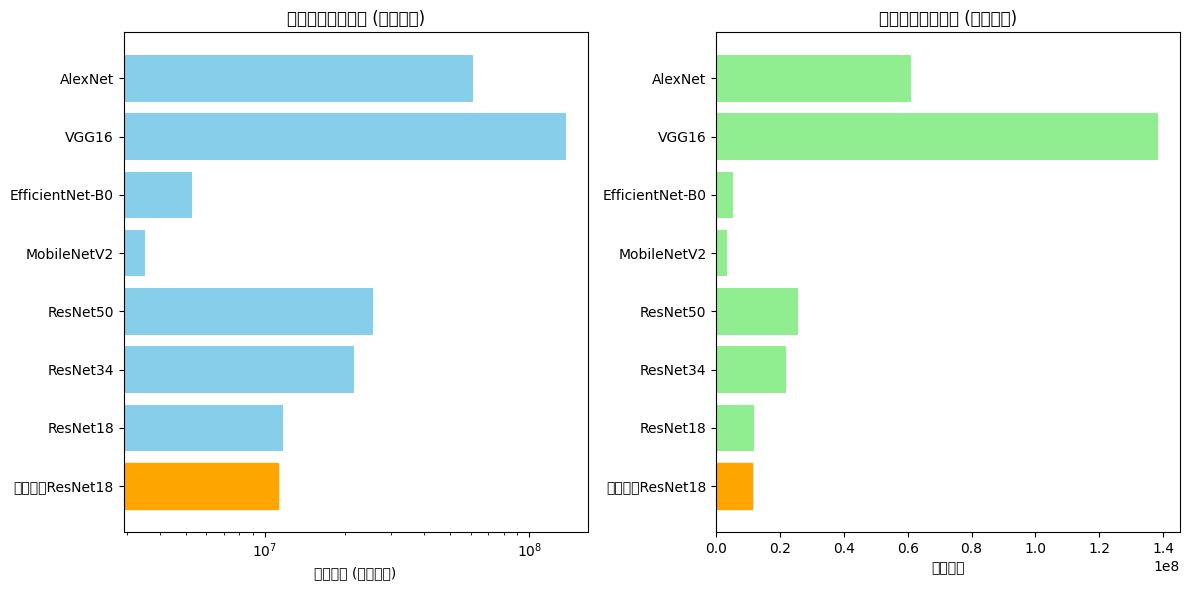


✅ 模型比较图表已保存: /mnt/MCP/gesture_models/model_size_comparison.png


In [36]:
def compare_with_other_models():
    """与其他常见模型比较大小"""
    print(f"\n🏆 与其他模型比较")
    print("=" * 50)
    
    # 常见模型的参数数量（近似值）
    model_comparison = {
        "手势分类ResNet18": total_params,
        "ResNet18": 11689512,
        "ResNet34": 21797672,
        "ResNet50": 25557032,
        "MobileNetV2": 3504872,
        "EfficientNet-B0": 5288548,
        "VGG16": 138357544,
        "AlexNet": 61100840
    }
    
    print(f"{'模型':<25} {'参数数量':>15} {'相对大小':>10}")
    print("-" * 55)
    
    our_model_params = model_comparison["手势分类ResNet18"]
    
    for model_name, params in sorted(model_comparison.items(), key=lambda x: x[1]):
        relative_size = params / our_model_params
        print(f"{model_name:<25} {params:>15,} {relative_size:>9.2f}x")
    
    # 可视化比较
    plt.figure(figsize=(12, 6))
    models = list(model_comparison.keys())
    params = list(model_comparison.values())
    
    # 对数尺度
    plt.subplot(1, 2, 1)
    bars = plt.barh(models, params, color='skyblue')
    plt.xscale('log')
    plt.xlabel('参数数量 (对数尺度)')
    plt.title('模型参数数量比较 (对数尺度)')
    
    # 为我们的模型着色
    for i, bar in enumerate(bars):
        if models[i] == "手势分类ResNet18":
            bar.set_color('orange')
    
    # 线性尺度
    plt.subplot(1, 2, 2)
    bars = plt.barh(models, params, color='lightgreen')
    plt.xlabel('参数数量')
    plt.title('模型参数数量比较 (线性尺度)')
    
    # 为我们的模型着色
    for i, bar in enumerate(bars):
        if models[i] == "手势分类ResNet18":
            bar.set_color('orange')
    
    plt.tight_layout()
    plt.savefig(os.path.join(model_dir, 'model_size_comparison.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ 模型比较图表已保存: {os.path.join(model_dir, 'model_size_comparison.png')}")

# 与其他模型比较
compare_with_other_models()

In [37]:
def generate_model_size_report(model, model_dir):
    """生成完整的模型大小报告"""
    print(f"\n📋 生成完整的模型大小报告")
    print("=" * 50)
    
    # 收集所有信息
    total_params, storage_size_mb = analyze_model_size(model)
    full_model_path, state_dict_path = save_and_check_model_size(model, model_dir)
    inference_memory = estimate_inference_memory(model)
    
    # 创建报告
    report = {
        "生成时间": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "模型名称": "手势分类ResNet18",
        "参数统计": {
            "总参数": f"{total_params:,}",
            "可训练参数": f"{sum(p.numel() for p in model.parameters() if p.requires_grad):,}",
            "不可训练参数": f"{sum(p.numel() for p in model.parameters() if not p.requires_grad):,}"
        },
        "存储大小": {
            "理论大小 (FP32)": f"{storage_size_mb:.2f} MB",
            "完整模型文件": f"{os.path.getsize(full_model_path)/1024**2:.2f} MB",
            "状态字典文件": f"{os.path.getsize(state_dict_path)/1024**2:.2f} MB"
        },
        "内存估算": {
            "推理内存 (批处理大小1)": f"{inference_memory/1024**2:.2f} MB",
            "批处理大小8": f"{inference_memory * 8/1024**2:.2f} MB",
            "批处理大小16": f"{inference_memory * 16/1024**2:.2f} MB"
        },
        "优化建议": [
            "考虑使用FP16精度减少50%内存占用",
            "对于移动设备，考虑量化到INT8",
            "使用模型剪枝减少参数数量",
            "考虑使用更轻量的架构如MobileNet"
        ]
    }
    
    # 保存报告
    report_path = os.path.join(model_dir, "model_size_report.json")
    with open(report_path, 'w', encoding='utf-8') as f:
        json.dump(report, f, indent=2, ensure_ascii=False)
    
    # 打印报告摘要
    print(f"\n🎯 模型大小报告摘要:")
    print(f"   总参数: {report['参数统计']['总参数']}")
    print(f"   存储大小: {report['存储大小']['状态字典文件']}")
    print(f"   推理内存: {report['内存估算']['推理内存 (批处理大小1)']}")
    print(f"   完整报告: {report_path}")
    
    return report

# 生成完整报告
model_size_report = generate_model_size_report(model, model_dir)


📋 生成完整的模型大小报告
📏 ResNet18 模型大小分析
📊 参数统计:
   总参数: 11,181,129
   可训练参数: 11,181,129
   不可训练参数: 0
   可训练参数占比: 100.00%

💾 存储大小估算 (FP32):
   字节: 44,724,516 B
   兆字节: 42.65 MB
   千兆字节: 0.0417 GB

🎯 不同精度下的存储大小:
   FP32 (32位): 42.65 MB
   FP16 (16位): 21.33 MB
   INT8 (8位): 10.66 MB
   INT4 (4位): 5.33 MB


NameError: name 'save_and_check_model_size' is not defined